# 1. Import Dependencies and Dataset

In [137]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import folium

%matplotlib inline
sns.set_theme(style="darkgrid")

In [138]:
df = pd.read_csv('./data/fatalities_isr_pse_conflict_2000_to_2023.csv')

# 2. Understand acquired data

In [139]:
# Read transposed data by top 5
df.head().T

,0,1,2,3,4
name,'Abd a-Rahman Suleiman Muhammad Abu Daghash,Usayed Farhan Muhammad 'Ali Abu 'Ali,'Abdallah 'Imad Sa'ed Abu Hassan,Durgham Muhammad Yihya al-Akhras,Raafat 'Omar Ahmad Khamaisah
date_of_event,2023-09-24,2023-09-24,2023-09-22,2023-09-20,2023-09-19
age,32.0,21.0,16.0,19.0,15.0
citizenship,Palestinian,Palestinian,Palestinian,Palestinian,Palestinian
event_location,Nur Shams R.C.,Nur Shams R.C.,Kfar Dan,'Aqbat Jaber R.C.,Jenin R.C.
event_location_district,Tulkarm,Tulkarm,Jenin,Jericho,Jenin
event_location_region,West Bank,West Bank,West Bank,West Bank,West Bank
date_of_death,2023-09-24,2023-09-24,2023-09-22,2023-09-20,2023-09-19
gender,M,M,M,M,M
took_part_in_the_hostilities,NaN,NaN,NaN,NaN,NaN


In [140]:
df.shape

(11124, 16)

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11124 entries, 0 to 11123
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          11124 non-null  object 
 1   date_of_event                 11124 non-null  object 
 2   age                           10995 non-null  float64
 3   citizenship                   11124 non-null  object 
 4   event_location                11124 non-null  object 
 5   event_location_district       11124 non-null  object 
 6   event_location_region         11124 non-null  object 
 7   date_of_death                 11124 non-null  object 
 8   gender                        11104 non-null  object 
 9   took_part_in_the_hostilities  9694 non-null   object 
 10  place_of_residence            11056 non-null  object 
 11  place_of_residence_district   11056 non-null  object 
 12  type_of_injury                10833 non-null  object 
 13  a

In [142]:
df.describe()

,age
count,10995.000000
mean,26.745703
std,13.780548
min,1.000000
25%,19.000000
50%,23.000000
75%,31.000000
max,112.000000


In [143]:
# Check missing value
df.isna().sum()

name                               0
date_of_event                      0
age                              129
citizenship                        0
event_location                     0
event_location_district            0
event_location_region              0
date_of_death                      0
gender                            20
took_part_in_the_hostilities    1430
place_of_residence                68
place_of_residence_district       68
type_of_injury                   291
ammunition                      5253
killed_by                          0
notes                            280
dtype: int64

### How to preprocess missing value
- age는 평균값으로 대체
- gender, place_of_residence, place_of_residence_district, type_of_injury, note는 최빈값으로 대체
- took_part_in_the_hostilities, ammunition은 변수 자체를 제거

In [144]:
print(df['date_of_event'].head(), df['date_of_death'].head())

0    2023-09-24
1    2023-09-24
2    2023-09-22
3    2023-09-20
4    2023-09-19
Name: date_of_event, dtype: object 0    2023-09-24
1    2023-09-24
2    2023-09-22
3    2023-09-20
4    2023-09-19
Name: date_of_death, dtype: object


|#|Column Name|Description|Missing Value|
|--|--|--|--|
|0|name|사망자 이름|-|
|1|date_of_event|사건 일자|-|
|2|age|사망자 나이|exist|
|3|citizenship|국적|-|
|4|event_location|사건 장소|-|
|5|event_location_district|사건 장소 지구|-|
|6|event_location_region|사건 장소 지역|-|
|7|date_of_death|사망 일자|-|
|8|gender|성별|exist|
|9|took_part_in_the_hostilities|교전 참가 여부|exist|
|10|place_of_residence|거주지|exist|
|11|place_of_residence_district|거주지 지구|exist|
|12|type_of_injury|부상 종류|exist|
|13|ammunition|탄약 종류|exist|
|14|killed_by|살해자|-|
|15|notes|사망 원인|exist|

# 3. Write Worksheets

### Q1. 어느 국가에서 더 많이 사망하였을까?
### Q2. 몇년도에 가장 많은 사상자가 나타났을까?
### Q3. 
### Q4.
### Q5.
### Q6.

# 4. Data Preprocessing

In [145]:
# 나이 (age) 열을 평균값으로 대체
age_mean = df['age'].mean()
df['age'].fillna(age_mean, inplace=True)

In [146]:
# 성별 (gender), 거주지 (place_of_residence), 거주지 지역 (place_of_residence_district),
# 부상 유형 (type_of_injury), 비고 (notes) 열을 최빈값으로 대체
gender_mode = df['gender'].mode()[0]
place_of_residence_mode = df['place_of_residence'].mode()[0]
place_of_residence_district_mode = df['place_of_residence_district'].mode()[0]
type_of_injury_mode = df['type_of_injury'].mode()[0]
notes_mode = df['notes'].mode()[0]

df['gender'].fillna(gender_mode, inplace=True)
df['place_of_residence'].fillna(place_of_residence_mode, inplace=True)
df['place_of_residence_district'].fillna(place_of_residence_district_mode, inplace=True)
df['type_of_injury'].fillna(type_of_injury_mode, inplace=True)
df['notes'].fillna(notes_mode, inplace=True)

In [147]:
# took_part_in_the_hostilities, ammunition 열 제거
df.drop(['took_part_in_the_hostilities', 'ammunition'], axis=1, inplace=True)

In [148]:
df.isna().sum() # missing value 처리 완료

name                           0
date_of_event                  0
age                            0
citizenship                    0
event_location                 0
event_location_district        0
event_location_region          0
date_of_death                  0
gender                         0
place_of_residence             0
place_of_residence_district    0
type_of_injury                 0
killed_by                      0
notes                          0
dtype: int64

In [149]:
df['citizenship'].value_counts()

citizenship
Palestinian    10092
Israeli         1029
Jordanian          2
American           1
Name: count, dtype: int64

In [150]:
# 'Jordanian' 또는 'American' 국적을 가진 행 삭제
df = df[~df['citizenship'].isin(['Jordanian', 'American'])]
df['citizenship'].value_counts()

citizenship
Palestinian    10092
Israeli         1029
Name: count, dtype: int64

# 5. Data Visualization(Data Analysis)

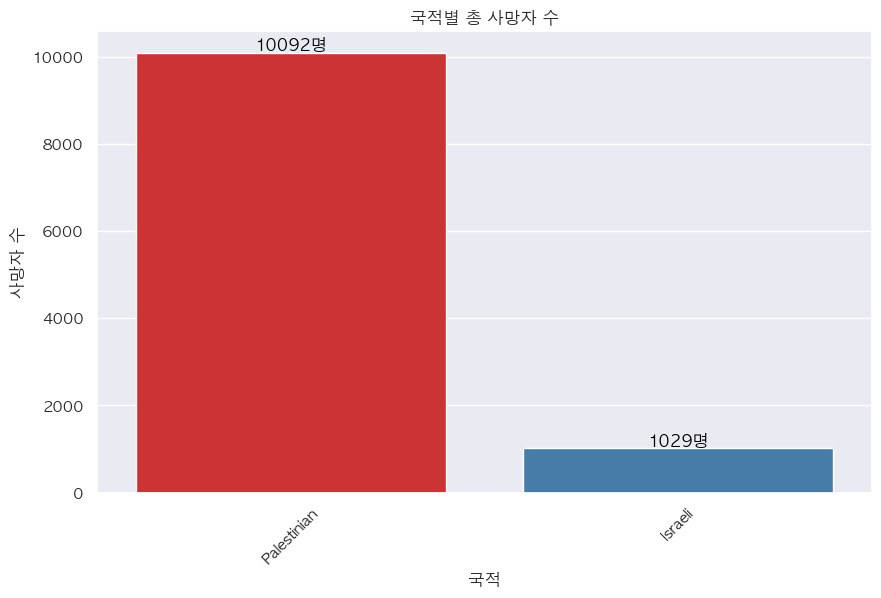

In [167]:
# Q1. 어느 국가에서 더 많이 사망하였을까?
# 국적별 총 사망자 수를 카운트 플롯 작성
sns.set(style="darkgrid", palette="Set1")
plt.figure(figsize=(10, 6))
plt.rcParams['font.family'] = 'AppleGothic'

# countplot을 사용하여 국적별 사망자 수를 시각화합니다.
ax = sns.countplot(x='citizenship', data=df)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}명', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')
    
# 그래프에 제목과 레이블 추가
plt.title("국적별 총 사망자 수")
plt.xlabel("국적")
plt.ylabel("사망자 수")

# x 축 레이블을 45도 기울임
plt.xticks(rotation=45)

# 그래프를 표시
plt.show()

- 사망자 국적: 팔레스타인 사망자가 이스라엘보다 약 10배 많음

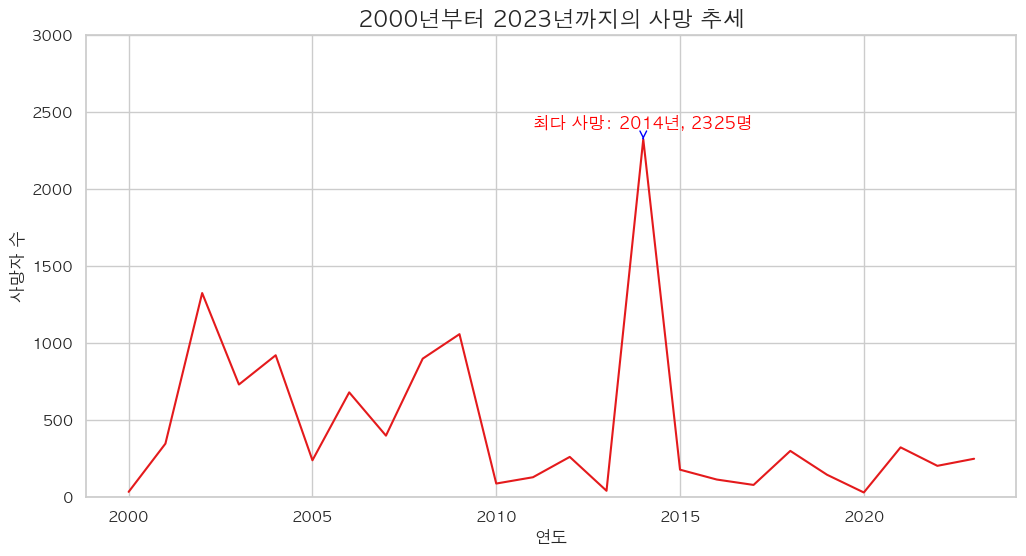

In [199]:
# Q2. 몇년도에 가장 많은 사상자가 나타났을까?

# 가장 높은 사망자 수를 가진 연도를 찾기
max_fatalities_year = fatality_by_year[fatality_by_year['fatalities'] == fatality_by_year['fatalities'].max()]

df['date_of_death'] = pd.to_datetime(df['date_of_death']) # "date_of_death" 열을 datetime 형식으로 변환

# "date_of_death" 열을 기준으로 연도 추출
df['year'] = df['date_of_death'].dt.year

# 연도별 사망자 수 계산
fatality_by_year = df.groupby('year').size().reset_index(name='fatalities')

sns.set(style="whitegrid", palette="Set1")
plt.rcParams['font.family'] = 'AppleGothic'

plt.figure(figsize=(12, 6))
ax = sns.lineplot(x='year', y='fatalities', data=fatality_by_year, markers=True)

# 가장 높은 사망자 수가 있는 연도에 마커 표시
if not max_fatalities_year.empty:
    max_year = max_fatalities_year.iloc[0]['year']
    max_fatalities = max_fatalities_year.iloc[0]['fatalities']
    ax.annotate(f'최다 사망: {most_fatal_day["year"]}년, {max_fatalities}명', (max_year, max_fatalities),
                ha='center', va='bottom', fontsize=12, color='red', xytext=(0, 5),
                textcoords='offset points', arrowprops=dict(arrowstyle='->', color='blue'))

# 그래프 제목 및 라벨 설정
plt.title('2000년부터 2023년까지의 사망 추세', fontsize=16)
plt.ylim(0, 3000)
plt.xlabel('연도', fontsize=12)
plt.ylabel('사망자 수', fontsize=12)

# 그래프 표시
plt.show()

<b>실제 2014년 7월 가자 지구에서 분쟁 발생</b>
<img width="300px" src="https://i.namu.wiki/i/HDB1_z_MuMtJMlnhBRUmXPQXglIy3uJEXnsg39NZhbcwuYeRWWmquZennZPcJX_ieH4mZX5BUnjvN9l7xvJRbU32bofNmFQeTAlNvcu6tEkBs1SbIbgC9O-sCf2POg1XQa7U9LZrfAhU2EWiKSkUIQ.webp">
- 나무위키 설명: <a href="https://namu.wiki/w/2014%EB%85%84%207%EC%9B%94%20%EA%B0%80%EC%9E%90%20%EC%A7%80%EA%B5%AC%20%EB%B6%84%EC%9F%81">더보기</a>

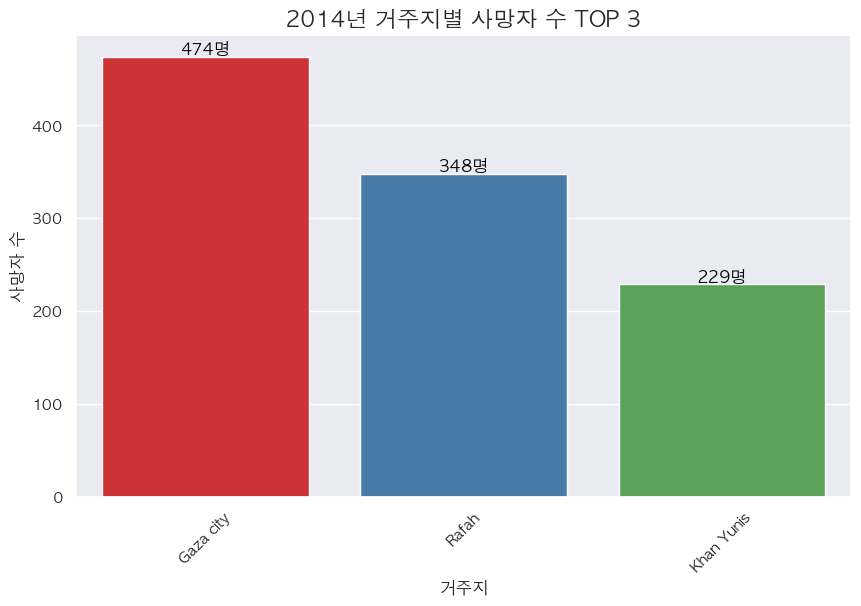

In [201]:
df_2014 = df[df['date_of_death'].dt.year == 2014]

residence_death_counts = df_2014['place_of_residence'].value_counts() # 거주지별 사망자 수 계산

top_3_residences = residence_death_counts.head(3) # 상위 3개 지역 선택

sns.set(style="darkgrid", palette="Set1")
plt.rcParams['font.family'] = 'AppleGothic'
plt.figure(figsize=(10, 6))

ax = sns.barplot(x=top_3_residences.index, y=top_3_residences.values, palette="Set1")

plt.title('2014년 거주지별 사망자 수 TOP 3', fontsize=16)
plt.xlabel('거주지', fontsize=12)
plt.ylabel('사망자 수', fontsize=12)

plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}명', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

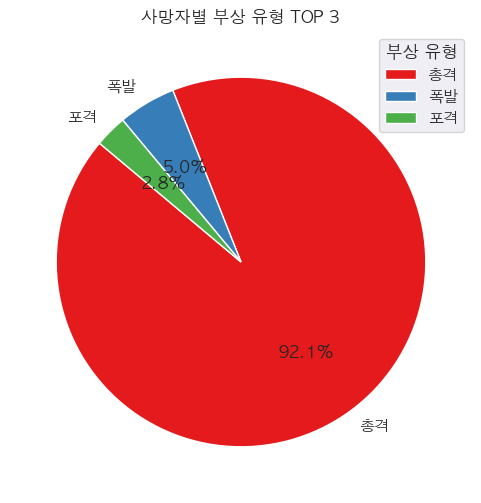

In [154]:
# 부상 유형에 따른 사망률 분석
injury_death_counts = df['type_of_injury'].value_counts()[:3]

plt.figure(figsize=(6, 6))
sns.set(style="darkgrid", palette="Set1")
plt.rcParams['font.family'] = 'AppleGothic'
plot = plt.pie(injury_death_counts, labels=['총격', '폭발', '포격'], autopct='%1.1f%%', startangle=140)

plt.title("사망자별 부상 유형 TOP 3")
plt.legend(title="부상 유형", labels=["총격", "폭발", "포격"], loc="upper right")
plt.show()

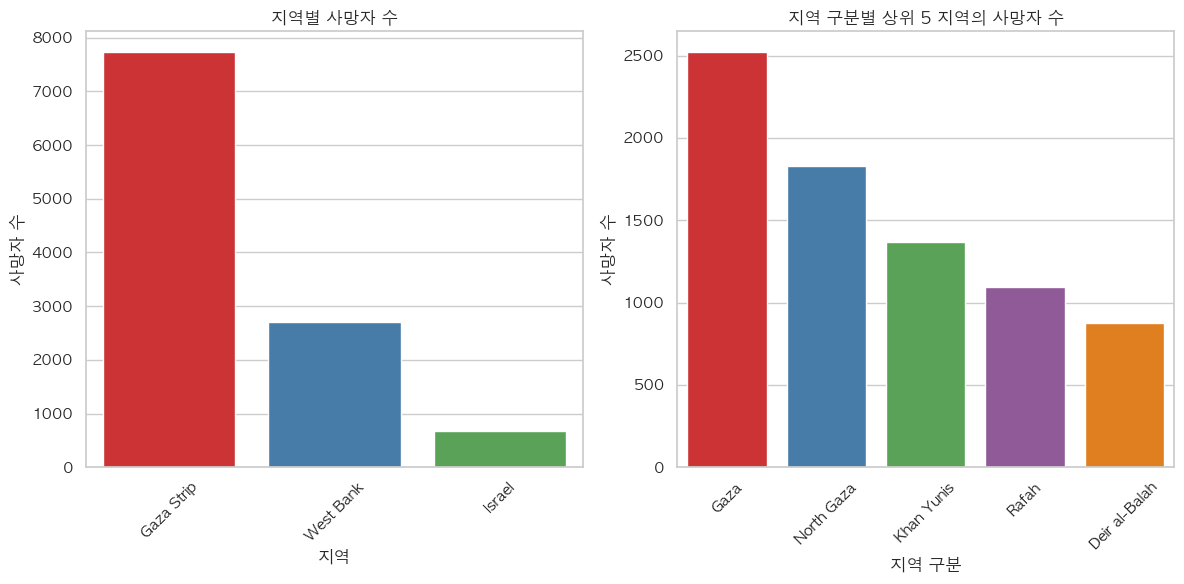

In [203]:
# 지역별 사망률 분석
region_death_counts = df['event_location_region'].value_counts()
district_death_counts = df['place_of_residence_district'].value_counts()

sns.set(style="whitegrid", palette="Set1")
plt.rcParams['font.family'] = 'AppleGothic'
plt.figure(figsize=(12, 6))

# 첫 번째 subplot: 지역별 사망자 수
plt.subplot(1, 2, 1)
sns.barplot(x=region_death_counts.index, y=region_death_counts.values, palette="Set1")
plt.title("지역별 사망자 수")
plt.xlabel("지역")
plt.ylabel("사망자 수")
plt.xticks(rotation=45)

# 두 번째 subplot: 지역 구분별 상위 5 지역의 사망자 수
plt.subplot(1, 2, 2)
sns.barplot(x=district_death_counts[:5].index, y=district_death_counts[:5].values, palette="Set1")
plt.title("지역 구분별 상위 5 지역의 사망자 수")
plt.xlabel("지역 구분")
plt.ylabel("사망자 수")
plt.xticks(rotation=45)

# 그래프를 표시
plt.tight_layout()
plt.show()

In [200]:
# 주요 지역 좌표 정의
district_coords = {
    'Gaza': [31.5, 34.466667],
    'Hebron': [31.532569, 35.095388],
    'Jenin': [32.457336, 35.286865],
    'Nablus': [32.221481, 35.254417],
    'Ramallah': [31.902922, 35.206209],
    'Bethlehem': [31.705791, 35.200657],
    'Tulkarm': [32.308628, 35.028537],
    'Jericho': [31.857163, 35.444362],
    'Rafah': [31.296866, 34.245536],
    'Khan Yunis': [31.346201, 34.306286]
}

# 각 구역별 사망자 수
district_fatalities = df.groupby('event_location_district').size()

# Function to determine the color of the circle based on the number of fatalities
def get_color(fatalities):
    if fatalities > 500:
        return 'darkred'
    elif fatalities > 100:
        return 'grey'
    elif fatalities > 50:
        return 'orange'
    else:
        return 'green'

# 기본 지도 생성
m = folium.Map(location=[31.5, 34.75], zoom_start=8)

# maker, tooltip 추가
for district, coords in district_coords.items():
    fatalities = district_fatalities.get(district, 0)
    folium.Marker(
        location=coords,
        tooltip=f'지역명: {district}, 사망자: {fatalities}명',  # 지역명과 사망자 수 표시
        icon=None
    ).add_to(m)
    folium.Circle(
        location=coords,
        radius=np.sqrt(fatalities) * 1200, # 반경 크기
        color=get_color(fatalities),
        fill=True,
        fill_color=get_color(fatalities),
        fill_opacity=0.6,
    ).add_to(m)

# 레이어 컨트롤 추가
folium.LayerControl().add_to(m)

m

# 6. Conclusion and Summary